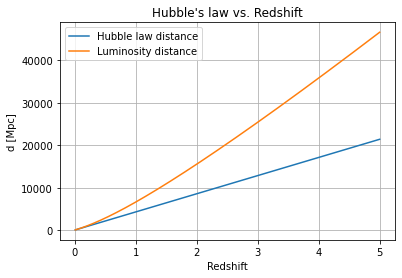

<Figure size 432x288 with 0 Axes>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import astropy.units as u
from astropy import constants as const
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15

# Define the cosmological model
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

H0 = cosmo.H(0).to(u.m/(u.s * u.Mpc))


# redshift range
z = np.linspace(0.01, 5, 1000)

# calculating the luminosity distance
ld =cosmo.luminosity_distance(z)
d = z*const.c / H0

# Plot Hubble's law
plt.plot(z, d, label='Hubble law distance')
plt.plot(z, ld, label='Luminosity distance')
plt.xlabel('Redshift')
plt.ylabel('d [Mpc]')
plt.title('Hubble\'s law vs. Redshift')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('ex_2a.png')





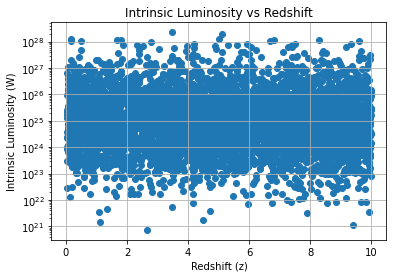

<Figure size 432x288 with 0 Axes>

In [92]:
Ngalax =5000

# redshift range
z_max = 10.0
z_min = 0.02
z1 = np.arange(z_min, z_max, 0.01)

# flux density
mu_radio, sigma_radio = np.log(1e25), 2.5
L_radio = np.random.lognormal(mu_radio, sigma_radio, Ngalax)* u.W / u.Hz

# Calculate the redshift and intrinsic luminosity
z1 = z_min + np.random.random(Ngalax) * (z_max - z_min)
S = 1e-3 * np.ones_like(z1)  # 1 Jy

# Convert flux density to W m^-2 Hz^-1
S_W = S * (10**26)

# Calculate the luminosity distance and intrinsic luminosity
d_l = cosmo.luminosity_distance(z1).value  # in Mpc
L = 4 * np.pi * (d_l ** 2) * S_W  # in Watts (W)

# Plot the intrinsic luminosity as a function of redshift
plt.scatter(z1, L_radio)
plt.xlabel('Redshift (z)')
plt.ylabel('Intrinsic Luminosity (W)')
plt.yscale('log')
plt.title('Intrinsic Luminosity vs Redshift')
plt.grid(True)
plt.show()
plt.savefig('ex2b.png')



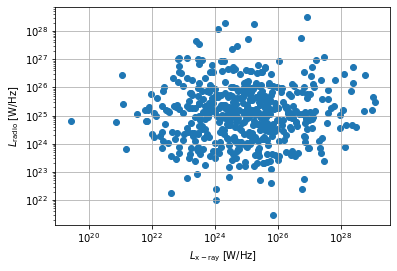

<Figure size 432x288 with 0 Axes>

In [78]:
# flux density
mu_radio, sigma_radio = np.log(1e25), 2.5
mu_xray, sigma_xray = np.log(1e25), 3.5
L_radio = np.random.lognormal(mu_radio, sigma_radio, Ngalax)* u.W / u.Hz
L_xray = np.random.lognormal(mu_xray, sigma_xray, Ngalax)* u.W / u.Hz

# Plot the intrinsic luminosity as a function of redshift
plt.scatter(L_xray, L_radio)
plt.xlabel(r'$L_{\rm x-ray}$ [W/Hz]')
plt.ylabel(r'$L_{\rm radio}$ [W/Hz]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()
plt.savefig('ex2c.png')


(1, 881)
correlation coeffecient 0.1591642791697024
No. of Sources detected in an observation with a sensitivity of 1 mJy: 881
No. of Sources not detected in an observation with a sensitivity of 1 mJy: 4119


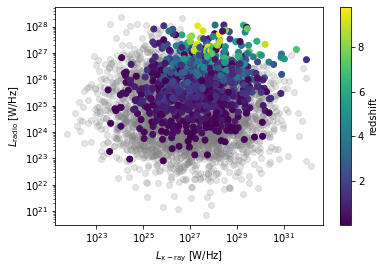

In [108]:
def Lum_min( z, flux_lim ) :
    Dlum = cosmo.luminosity_distance(z)
    L_min = 4. * np.pi * Dlum**2 * flux_lim
    L_min_WHz = L_min.to((u.W/u.Hz))
    return L_min_WHz 

fudge = 1.0 
flux_lim_radio = fudge* 1e-3 * u.Jy
flux_lim_xray  =  1e-3 * u.Jy

L_min_radio = Lum_min( z, flux_lim_radio )
L_min_xray  = Lum_min( z, flux_lim_xray )

ix = np.where( (L_radio>L_min_radio) & (L_xray>L_min_xray)  )
ix_not = np.where( ~((L_radio>L_min_radio) & (L_xray>L_min_xray))  )

print(np.shape(ix))

# Calculate correlation coefficient for L_xray and L_radio
cc = np.corrcoef(np.log((L_xray[ix]).value), np.log((L_radio[ix]).value))

print("correlation coeffecient", cc[0, 1])
print("No. of Sources detected in an observation with a sensitivity of 1 mJy:", len(ix[0]))
print("No. of Sources not detected in an observation with a sensitivity of 1 mJy:", len(ix_not[0]))

plt.scatter( L_xray[ix_not], L_radio[ix_not], c='gray', label='Do not satisfy condition', alpha=0.2 )
plt.scatter( L_xray[ix], L_radio[ix], c=z[ix], label='Satisfy condition' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$L_{\rm x-ray}$ [W/Hz]')
plt.ylabel(r'$L_{\rm radio}$ [W/Hz]')
plt.colorbar( label='redshift')
plt.savefig('ex2c.png')
            

